In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns

color = sns.color_palette()

df = pd.read_csv("Online_Retail.csv")

In [2]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [4]:
df.rename(index=str, columns={'InvoiceNo':'invoice_no',
                               'StockCode':'stock_code',
                                'Description': 'description',
                                 'Quantity':'quantity',
                                 'InvoiceDate':'invoice_date',
                                 'UnitPrice':'unit_price',
                                 'CustomerID':'customer_id',
                                 'Country':'country'},inplace=True)

In [5]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
invoice_no      541909 non-null object
stock_code      541909 non-null object
description     540455 non-null object
quantity        541909 non-null int64
invoice_date    541909 non-null object
unit_price      541909 non-null float64
customer_id     406829 non-null float64
country         541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [7]:
df.describe()

,quantity,unit_price,customer_id
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
df = df[df.quantity > 0]

In [9]:
filtered_data = df[['country','customer_id']].drop_duplicates();

In [10]:
filtered_data.head()

,country,customer_id
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0


In [11]:
df['description'] = df.description.str.lower()

In [12]:
df_new = df.dropna()
df_new.isnull().sum().sort_values(ascending=False)
df_new.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,white hanging heart t-light holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [13]:
x_axis = df_new.country.drop_duplicates();
x_axis.head()

0       United Kingdom
26              France
197          Australia
385        Netherlands
1109           Germany
Name: country, dtype: object

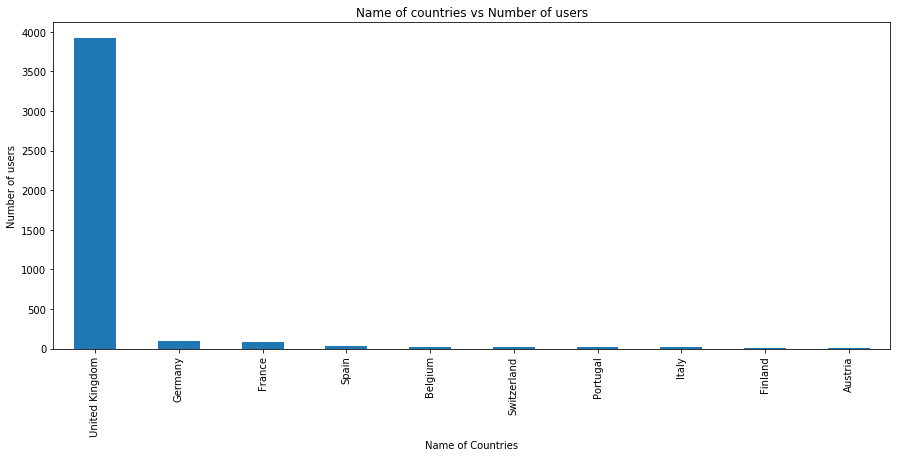

In [14]:
plt.subplots(figsize=(15,6))
filtered_data.country.value_counts()[:10].plot(kind='bar')
plt.xlabel('Name of Countries')
plt.ylabel('Number of users')
plt.title('Name of countries vs Number of users')
plt.show()

In [15]:
df_new.groupby(by=['customer_id','country'], as_index=False)['invoice_no'].count().head()

,customer_id,country,invoice_no
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


Text(0.5, 1.0, 'Customer ID vs Number of Orders')

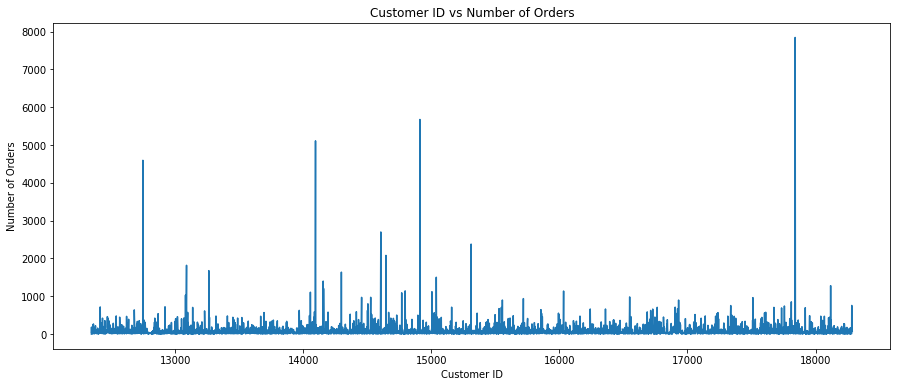

In [16]:
orders = df_new.groupby(by=['customer_id','country'],as_index=False)['invoice_no'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.customer_id,orders.invoice_no)
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Customer ID vs Number of Orders')

In [17]:
orders.sort_values(by='invoice_no',ascending=False).head()

,customer_id,country,invoice_no
4019,17841.0,United Kingdom,7847
1888,14911.0,EIRE,5677
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4596
1670,14606.0,United Kingdom,2700


In [18]:
df_new['amount_spent'] = df_new['quantity'] * df_new['unit_price']

/home/saeed/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Customer ID vs Money spent in Dollars')

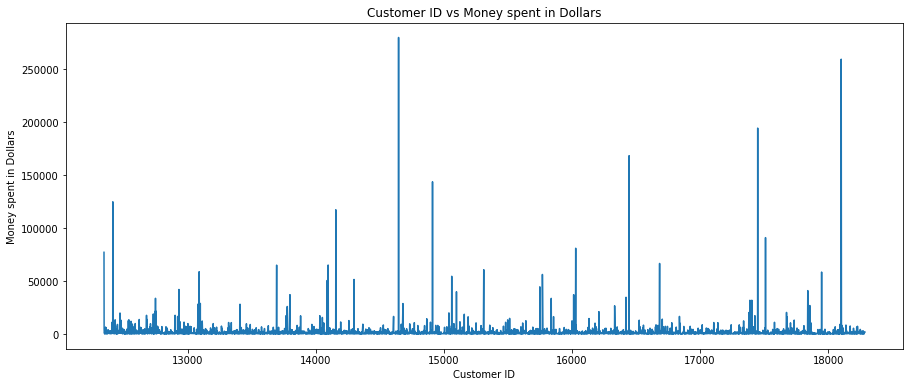

In [19]:
amount_spent = df_new.groupby(by=['customer_id','country'],as_index=False)['amount_spent'].sum()
plt.subplots(figsize=(15,6))
plt.plot(amount_spent.customer_id,amount_spent.amount_spent)
plt.xlabel('Customer ID')
plt.ylabel('Money spent in Dollars')
plt.title('Customer ID vs Money spent in Dollars')

In [20]:
amount_spent.sort_values(by='amount_spent',ascending=False).head()

,customer_id,country,amount_spent
1698,14646.0,Netherlands,280206.02
4210,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194550.79
3017,16446.0,United Kingdom,168472.50
1888,14911.0,EIRE,143825.06


In [21]:
df_new['invoice_date']=pd.to_datetime(df_new['invoice_date'],format='%m/%d/%Y %H:%M')

/home/saeed/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_new['month'] = pd.to_datetime(df_new.invoice_date).dt.month.astype(np.uint8)
df_new['year_month'] = df_new.invoice_date.map(lambda x: 100*x.year + x.month)
df_new['day'] = df_new.invoice_date.dt.dayofweek.astype(np.uint8)
df_new['hours'] = df_new.invoice_date.dt.hour.astype(np.uint8)

/home/saeed/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/saeed/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/saeed/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [23]:
df_new.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,amount_spent,month,year_month,day,hours
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,201012,2,8
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,201012,2,8
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,201012,2,8
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,201012,2,8
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,201012,2,8


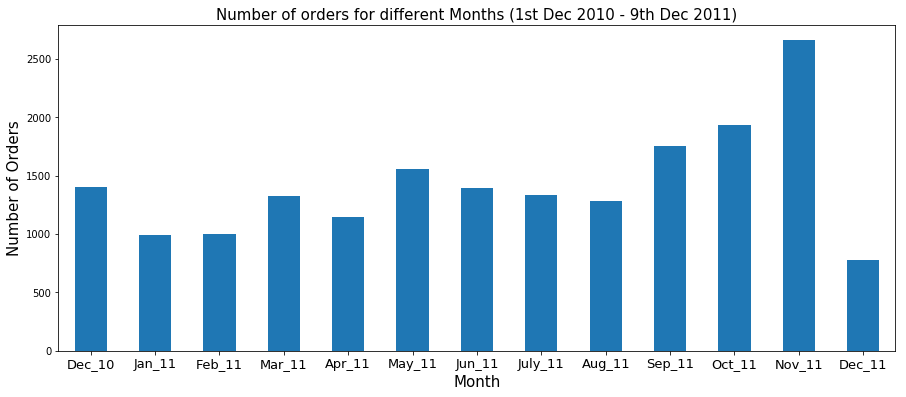

In [24]:
ax = df_new.groupby('invoice_no')['year_month'].unique().value_counts().sort_index().plot('bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

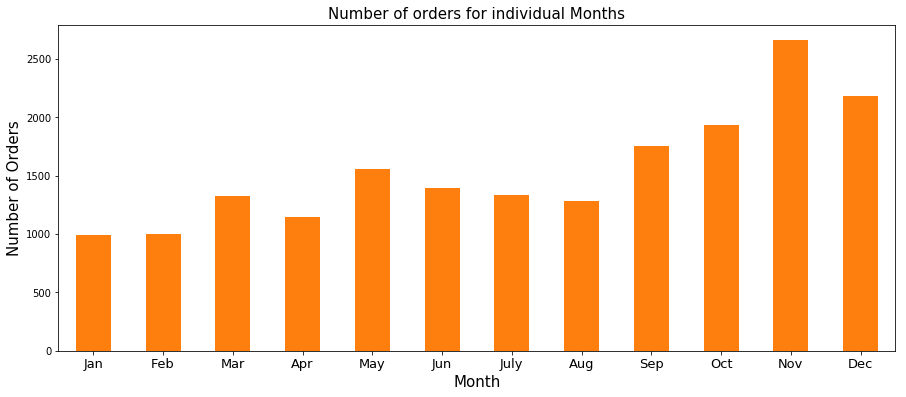

In [25]:
ax = df_new.groupby('invoice_no')['month'].unique().value_counts().sort_index().plot('bar',color=color[1],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for individual Months',fontsize=15)
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'), rotation='horizontal', fontsize=13)
plt.show()

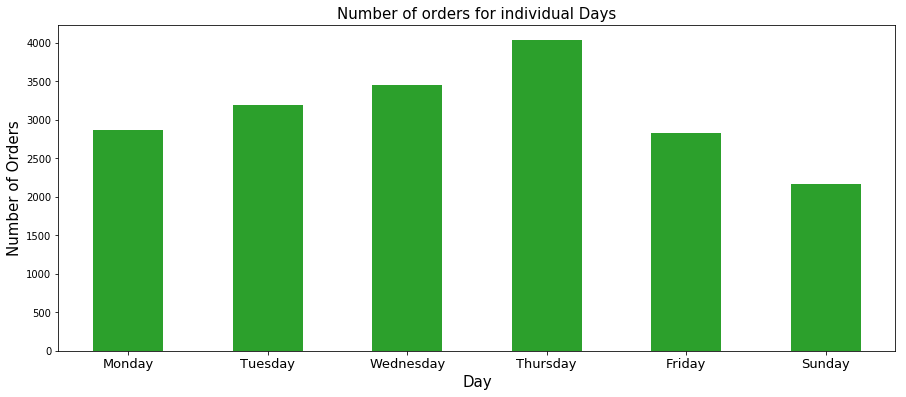

In [26]:
ax = df_new.groupby('invoice_no')['day'].unique().value_counts().sort_index().plot('bar',color=color[2],figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for individual Days',fontsize=15)
ax.set_xticklabels(('Monday','Tuesday','Wednesday','Thursday','Friday','Sunday'), rotation='horizontal', fontsize=13)
plt.show()

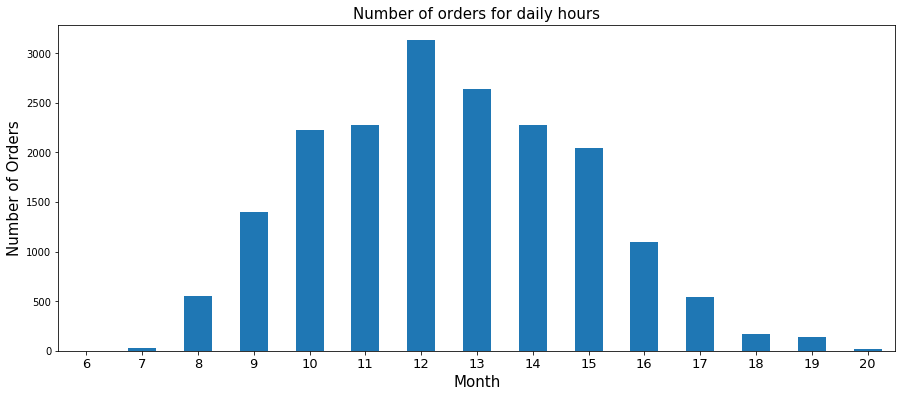

In [27]:
ax = df_new.groupby('invoice_no')['hours'].unique().value_counts().iloc[:-1].sort_index().plot('bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for daily hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=13)
plt.show()

In [28]:
df_new.unit_price.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: unit_price, dtype: float64

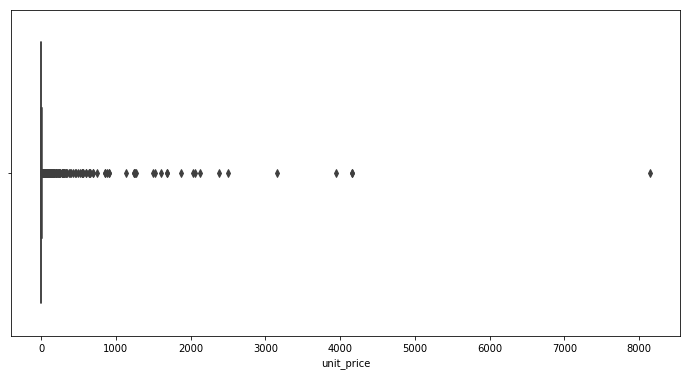

In [29]:
plt.subplots(figsize=(12,6))
sns.boxplot(df_new.unit_price)
plt.show()

In [30]:
df_free = df_new[df_new.unit_price == 0]

In [31]:
df_free.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,amount_spent,month,year_month,day,hours
9302,537197,22841,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647.0,Germany,0.0,12,201012,6,14
33576,539263,22580,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0.0,12,201012,3,14
40089,539722,22423,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,0.0,12,201012,1,13
47068,540372,22090,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0,1,201101,3,16
47070,540372,22553,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0,1,201101,3,16


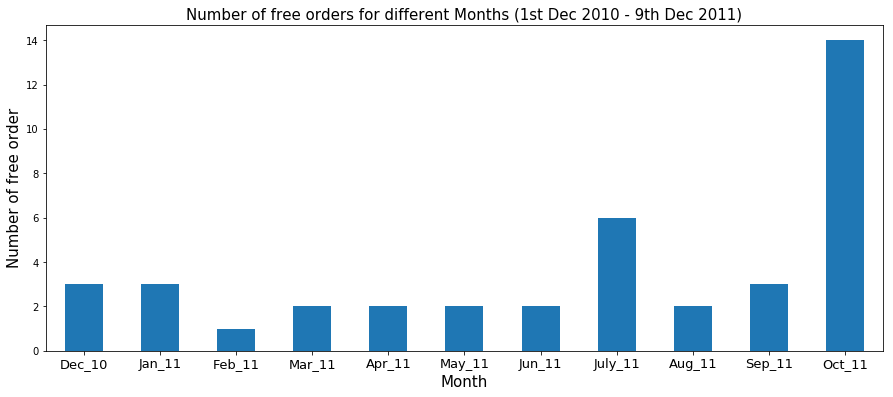

In [32]:
ax = df_free.year_month.value_counts().sort_index().plot('bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of free order',fontsize=15)
ax.set_title('Number of free orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

In [33]:
df_new.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,amount_spent,month,year_month,day,hours
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,201012,2,8
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,201012,2,8
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,201012,2,8
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,201012,2,8
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,201012,2,8


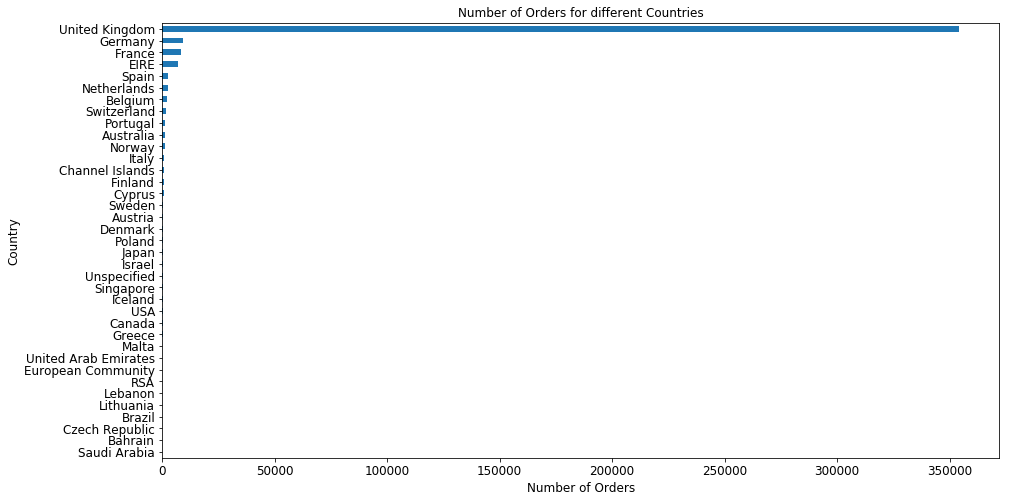

In [34]:
group_country_orders = df_new.groupby('country')['invoice_no'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

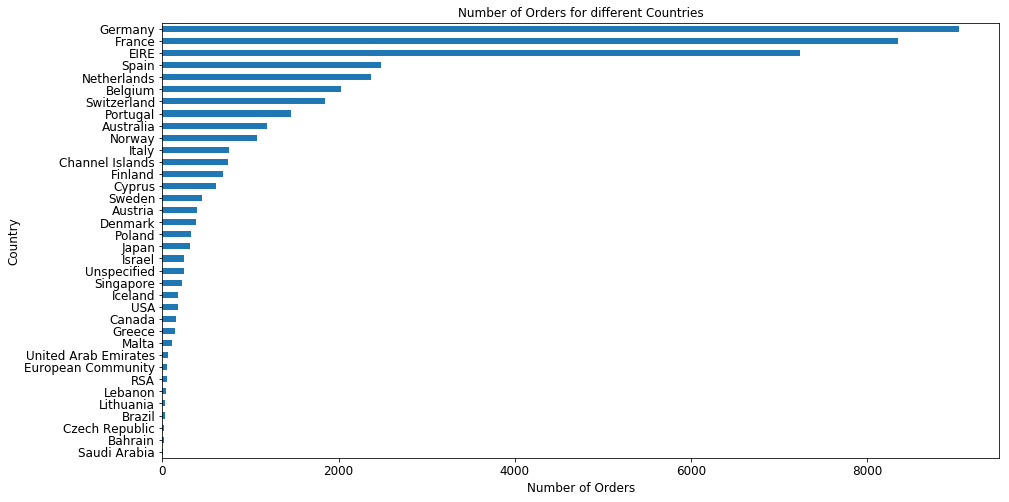

In [35]:
group_country_orders = df_new.groupby('country')['invoice_no'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

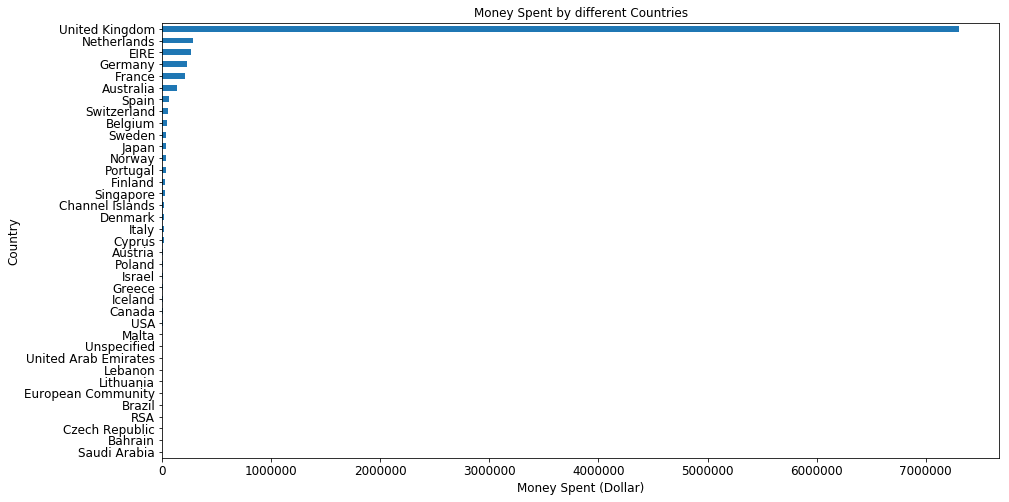

In [36]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

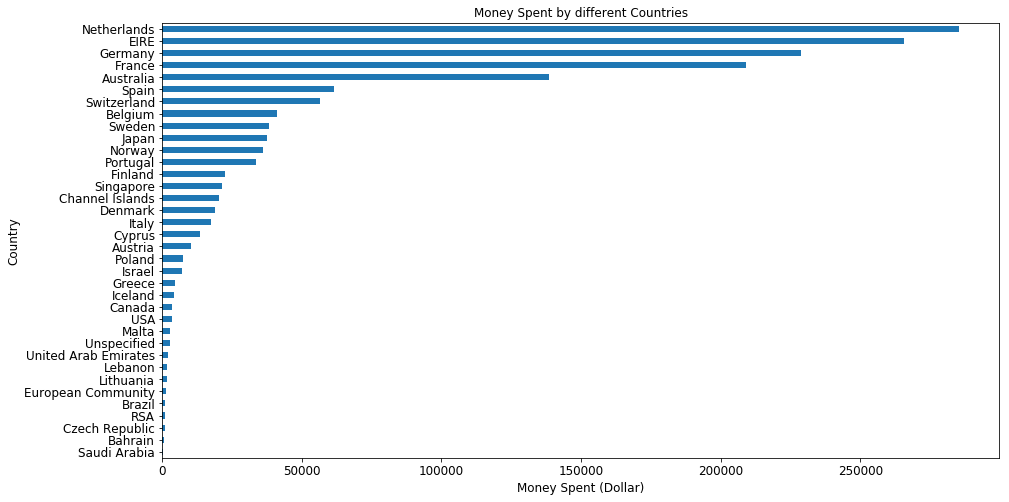

In [37]:
group_country_amount_spent = df_new.groupby('country')['amount_spent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot('barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

In [38]:
uk_data = df_new[df_new.country == 'United Kingdom']
uk_data.info();

<class 'pandas.core.frame.DataFrame'>
Index: 354345 entries, 0 to 541893
Data columns (total 13 columns):
invoice_no      354345 non-null object
stock_code      354345 non-null object
description     354345 non-null object
quantity        354345 non-null int64
invoice_date    354345 non-null datetime64[ns]
unit_price      354345 non-null float64
customer_id     354345 non-null float64
country         354345 non-null object
amount_spent    354345 non-null float64
month           354345 non-null uint8
year_month      354345 non-null int64
day             354345 non-null uint8
hours           354345 non-null uint8
dtypes: datetime64[ns](1), float64(3), int64(2), object(4), uint8(3)
memory usage: 30.8+ MB


In [39]:
uk_data.describe()

,quantity,unit_price,customer_id,amount_spent,month,year_month,day,hours
count,354345.000000,354345.000000,354345.000000,354345.000000,354345.000000,354345.000000,354345.000000,354345.000000
mean,12.048913,2.963793,15552.436219,20.625073,7.646271,201100.889297,2.641945,12.809920
std,190.428127,17.862067,1594.546025,326.033014,3.418174,24.143119,1.955919,2.242893
min,1.000000,0.000000,12346.000000,0.000000,1.000000,201012.000000,0.000000,6.000000
25%,2.000000,1.250000,14194.000000,4.160000,5.000000,201104.000000,1.000000,11.000000
50%,4.000000,1.950000,15522.000000,10.200000,9.000000,201107.000000,2.000000,13.000000
75%,12.000000,3.750000,16931.000000,17.700000,11.000000,201110.000000,4.000000,14.000000
max,80995.000000,8142.750000,18287.000000,168469.600000,12.000000,201112.000000,6.000000,20.000000


In [40]:
uk_data = uk_data[uk_data.quantity > 0];
uk_data.info();

<class 'pandas.core.frame.DataFrame'>
Index: 354345 entries, 0 to 541893
Data columns (total 13 columns):
invoice_no      354345 non-null object
stock_code      354345 non-null object
description     354345 non-null object
quantity        354345 non-null int64
invoice_date    354345 non-null datetime64[ns]
unit_price      354345 non-null float64
customer_id     354345 non-null float64
country         354345 non-null object
amount_spent    354345 non-null float64
month           354345 non-null uint8
year_month      354345 non-null int64
day             354345 non-null uint8
hours           354345 non-null uint8
dtypes: datetime64[ns](1), float64(3), int64(2), object(4), uint8(3)
memory usage: 30.8+ MB


In [41]:
uk_data=uk_data[['customer_id','invoice_date','invoice_no','quantity','unit_price']]
uk_data.head()

,customer_id,invoice_date,invoice_no,quantity,unit_price
0,17850.0,2010-12-01 08:26:00,536365,6,2.55
1,17850.0,2010-12-01 08:26:00,536365,6,3.39
2,17850.0,2010-12-01 08:26:00,536365,8,2.75
3,17850.0,2010-12-01 08:26:00,536365,6,3.39
4,17850.0,2010-12-01 08:26:00,536365,6,3.39


In [42]:
uk_data['total_price'] = uk_data['quantity'] * uk_data['unit_price']
uk_data.head()

,customer_id,invoice_date,invoice_no,quantity,unit_price,total_price
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [43]:
import datetime as dt

uk_data['invoice_date'].min(),uk_data['invoice_date'].max()


present = dt.datetime(2011,12,10)

uk_data['invoice_date'] = pd.to_datetime(uk_data['invoice_date'])

rfm= uk_data.groupby('customer_id').agg({'invoice_date': lambda date: (present - date.max()).days,
                                        'invoice_no': lambda num: len(num),
                                        'total_price': lambda price: price.sum()});

rfm.columns

Index(['invoice_date', 'invoice_no', 'total_price'], dtype='object')

In [44]:
rfm.rename(columns={'invoice_date': 'Recency', 
                         'invoice_no': 'Frequency', 
                         'total_price': 'MonetaryValue'}, inplace=True)

rfm.head()

,Recency,Frequency,MonetaryValue
customer_id,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [45]:
recency = pd.qcut(rfm['Recency'],4)
recency.iloc[1:1]

Series([], Name: Recency, dtype: category
Categories (4, interval[float64]): [(-0.001, 17.0] < (17.0, 50.0] < (50.0, 142.0] < (142.0, 373.0]])

In [46]:
frequency = pd.qcut(rfm['Frequency'],4)
frequency.iloc[1:1]

Series([], Name: Frequency, dtype: category
Categories (4, interval[float64]): [(0.999, 17.0] < (17.0, 41.0] < (41.0, 99.0] < (99.0, 7847.0]])

In [47]:
monetary_value = pd.qcut(rfm['MonetaryValue'],4)
monetary_value.iloc[1:1]

Series([], Name: MonetaryValue, dtype: category
Categories (4, interval[float64]): [(-0.001, 300.04] < (300.04, 651.82] < (651.82, 1575.89] < (1575.89, 259657.3]])

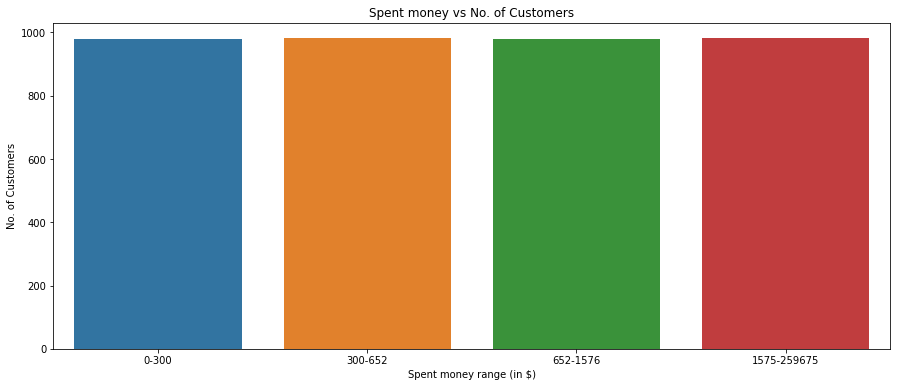

In [48]:
series1 = rfm['MonetaryValue'][(rfm['MonetaryValue'] <= 300)]
series2 = rfm['MonetaryValue'][(rfm['MonetaryValue'] >= 300) & (rfm['MonetaryValue'] <= 651.82)]
series3 = rfm['MonetaryValue'][(rfm['MonetaryValue'] >= 651.82) & (rfm['MonetaryValue'] <=1575.89)]
series4 = rfm['MonetaryValue'][(rfm['MonetaryValue'] >= 1575.89) & (rfm['MonetaryValue'] <= 259657.3)]

x = ['0-300','300-652','652-1576','1575-259675']
y = [len(series1.values),len(series2.values),len(series3.values),len(series4.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=x,y=y)
plt.title('Spent money vs No. of Customers')
plt.xlabel('Spent money range (in $)')
plt.ylabel('No. of Customers')
plt.show()

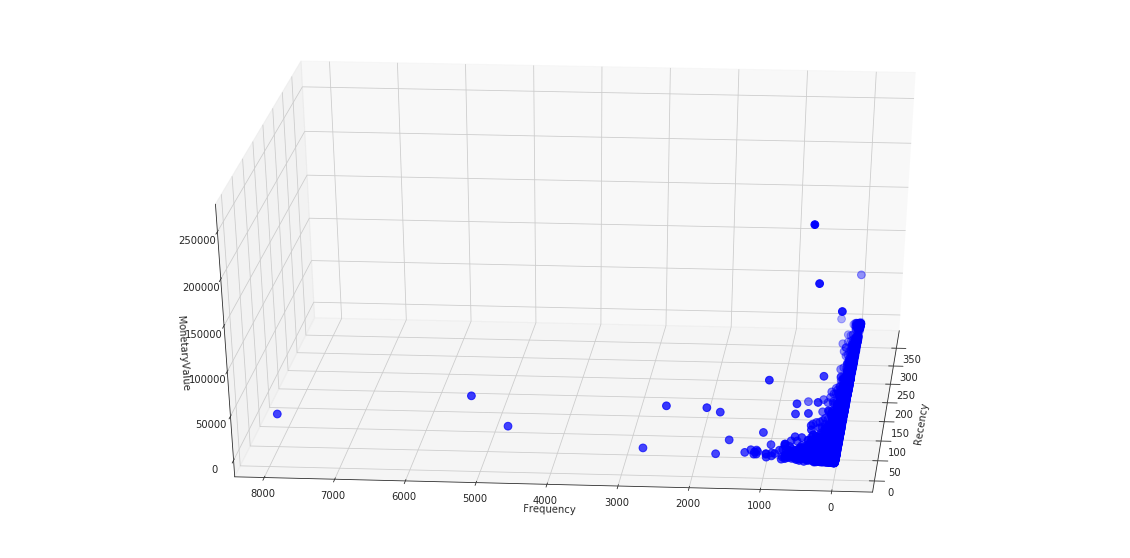

In [49]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['MonetaryValue'],c='blue',s=60)
ax.view_init(30,185)
plt.xlabel('Recency')
plt.ylabel('Frequency')
ax.set_zlabel('MonetaryValue')
plt.show()

Text(0.5, 0.92, 'Clusters using KMeans')

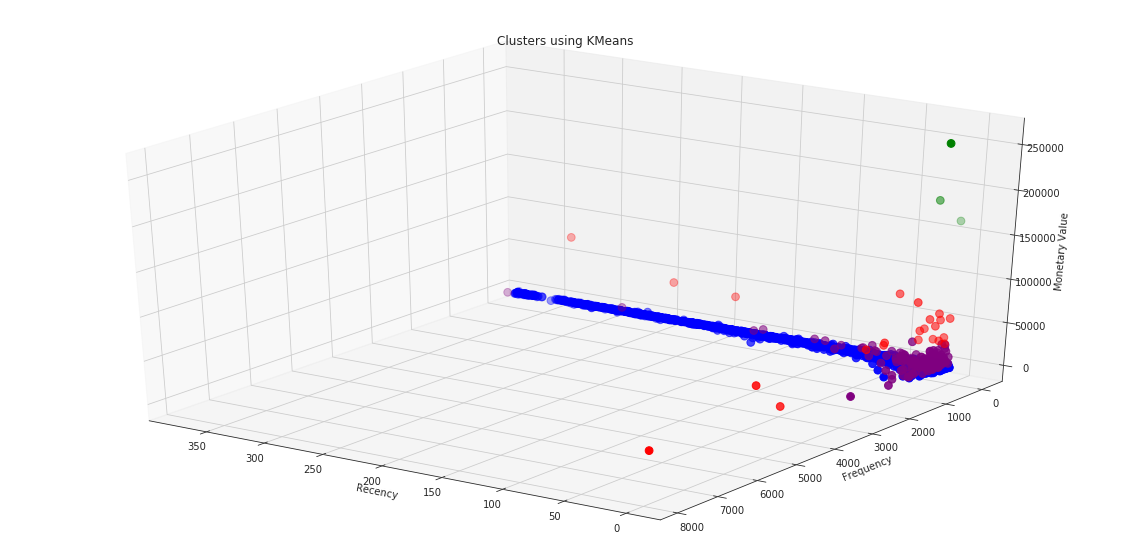

In [50]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(rfm)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm['Recency'][clusters==0],rfm['Frequency'][clusters==0],rfm['MonetaryValue'][clusters==0],c='blue',s=60)
ax.scatter(rfm['Recency'][clusters==1],rfm['Frequency'][clusters==1],rfm['MonetaryValue'][clusters==1],c='green',s=60)
ax.scatter(rfm['Recency'][clusters==2],rfm['Frequency'][clusters==2],rfm['MonetaryValue'][clusters==2],c='red',s=60)
ax.scatter(rfm['Recency'][clusters==3],rfm['Frequency'][clusters==3],rfm['MonetaryValue'][clusters==3],c='purple',s=60)
ax.view_init(30,125)
plt.xlabel('Recency')
plt.ylabel('Frequency')
ax.set_zlabel('Monetary Value')
plt.title('Clusters using KMeans')

In [51]:
rfm['r_quartile'] = pd.qcut(rfm['Recency'],4,[1,2,3,4]);
rfm['f_quartile'] = pd.qcut(rfm['Frequency'],4,[4,3,2,1]);
rfm['m_quartile'] = pd.qcut(rfm['MonetaryValue'],4,[4,3,2,1]);

rfm.head()

,Recency,Frequency,MonetaryValue,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [52]:
rfm['RFMScore'] = rfm.r_quartile.astype(str) + rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,Recency,Frequency,MonetaryValue,r_quartile,f_quartile,m_quartile,RFMScore
customer_id,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


In [53]:
# Finding best customers

best_customers = rfm[rfm.RFMScore =='111']
best_customers.head()

,Recency,Frequency,MonetaryValue,r_quartile,f_quartile,m_quartile,RFMScore
customer_id,,,,,,,
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12839.0,2,314,5591.42,1,1,1,111
12841.0,4,420,4022.35,1,1,1,111
